**Gurleen Kaur - 102003138**

**Ishit Choudhary - 102003133**


### Importing Libraries and Uploading Document

In [ ]:
import pandas as pd
import numpy as np
from google.colab import files
import io

In [ ]:
# Uploading the dataset
uploaded = files.upload()
df2 = pd.read_csv(io.BytesIO(uploaded['Attrition.csv']))

Saving Attrition.csv to Attrition (2).csv


In [ ]:
# Checking the dataset
df2.head()

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,JobInvolvement,...,PerformanceRating,RelationshipSatisfaction,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition
0,41,Travel_Rarely,1102,Sales,1,2,Life Sciences,2,Female,3,...,3,1,8,0,1,6,4,0,5,Yes
1,49,Travel_Frequently,279,Research & Development,8,1,Life Sciences,3,Male,2,...,4,4,10,3,3,10,7,1,7,No
2,37,Travel_Rarely,1373,Research & Development,2,2,Other,4,Male,2,...,3,2,7,3,3,0,0,0,0,Yes
3,33,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,4,Female,3,...,3,3,8,3,3,8,7,3,0,No
4,27,Travel_Rarely,591,Research & Development,2,1,Medical,1,Male,3,...,3,4,6,3,3,2,2,2,2,No


In [ ]:
# Checking information about all attributes
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 28 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   BusinessTravel            1470 non-null   object
 2   DailyRate                 1470 non-null   int64 
 3   Department                1470 non-null   object
 4   DistanceFromHome          1470 non-null   int64 
 5   Education                 1470 non-null   int64 
 6   EducationField            1470 non-null   object
 7   EnvironmentSatisfaction   1470 non-null   int64 
 8   Gender                    1470 non-null   object
 9   JobInvolvement            1470 non-null   int64 
 10  JobLevel                  1470 non-null   int64 
 11  JobRole                   1470 non-null   object
 12  JobSatisfaction           1470 non-null   int64 
 13  MaritalStatus             1470 non-null   object
 14  MonthlyIncome           

#Preprocessing

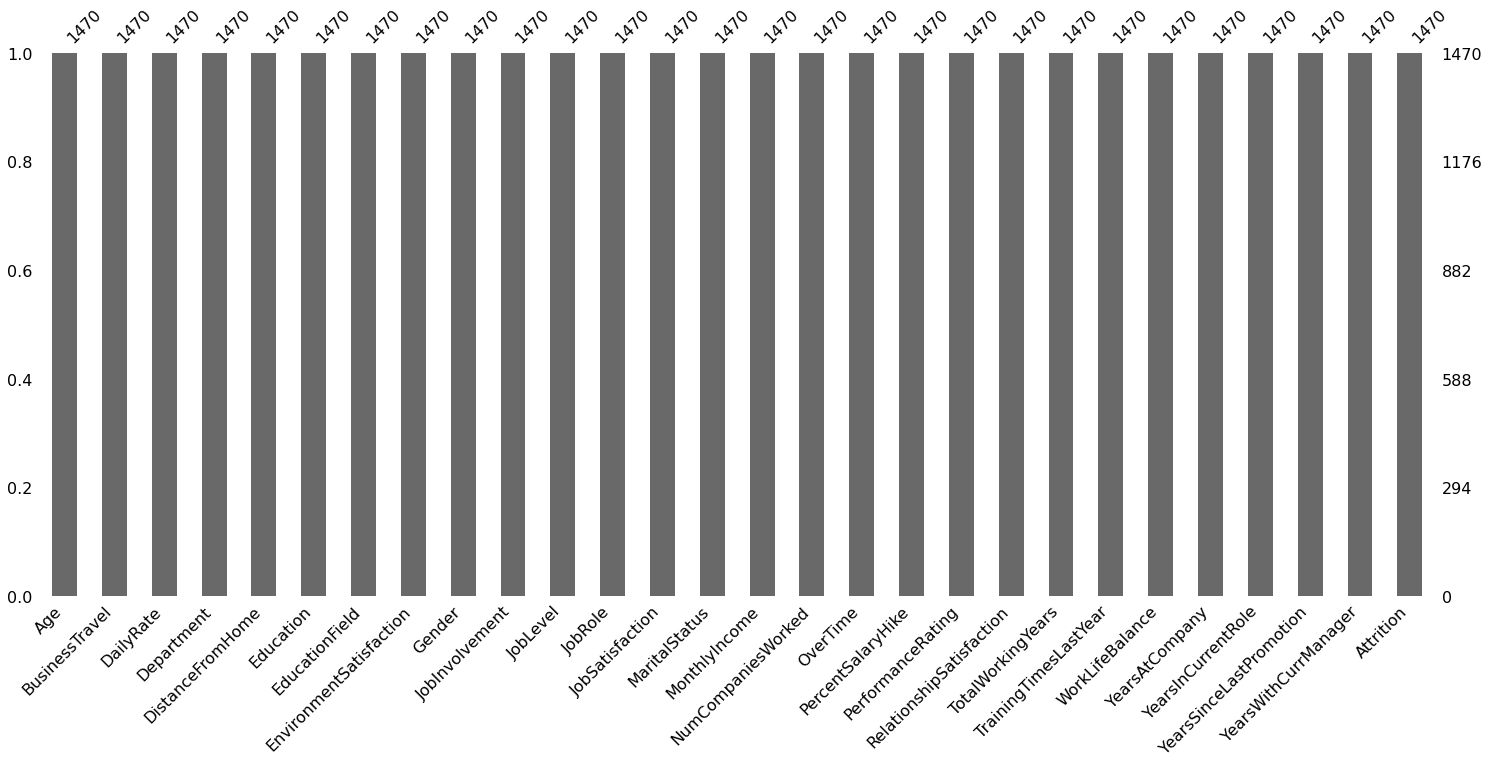

In [ ]:
# Checking for Null values
import missingno as msn
msn.bar(df2.iloc[:,:])

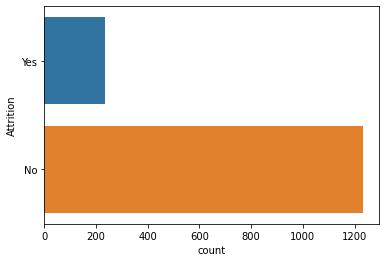

In [ ]:
# Checking for Class balancing
import seaborn as sns
sns.countplot(y=df2.iloc[:,-1],data=df2)

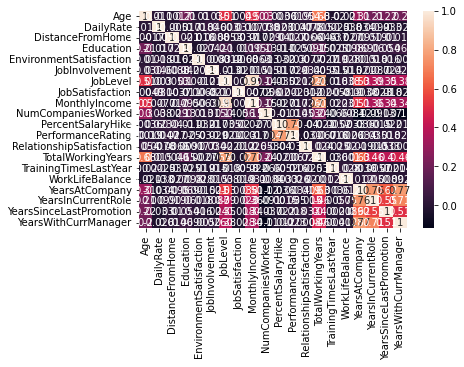

In [ ]:
# Checking correlation between input features
import seaborn as sns
sns.heatmap(df2.iloc[:,:].corr(),annot=True)

In [ ]:
# Label Encoding Data
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df2['BusinessTravel']=le.fit_transform(df2['BusinessTravel'])
df2['Department']=le.fit_transform(df2['Department'])
df2['EducationField']=le.fit_transform(df2['EducationField'])
df2['Gender']=le.fit_transform(df2['Gender'])
df2['JobRole']=le.fit_transform(df2['JobRole'])
df2['MaritalStatus']=le.fit_transform(df2['MaritalStatus'])
df2['OverTime']=le.fit_transform(df2['OverTime'])
df2['Attrition']=le.fit_transform(df2['Attrition'])
df2.head()

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,JobInvolvement,...,PerformanceRating,RelationshipSatisfaction,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition
0,41,2,1102,2,1,2,1,2,0,3,...,3,1,8,0,1,6,4,0,5,1
1,49,1,279,1,8,1,1,3,1,2,...,4,4,10,3,3,10,7,1,7,0
2,37,2,1373,1,2,2,4,4,1,2,...,3,2,7,3,3,0,0,0,0,1
3,33,1,1392,1,3,4,1,4,0,3,...,3,3,8,3,3,8,7,3,0,0
4,27,2,591,1,2,1,3,1,1,3,...,3,4,6,3,3,2,2,2,2,0


In [ ]:
# import library
from imblearn.over_sampling import SMOTE

smote = SMOTE()

X=df2.iloc[:,:-1]
Y=df2.iloc[:,-1]

# fit predictor and target variable
x_smote, y_smote = smote.fit_resample(X, Y)
X = x_smote
Y = y_smote
#print('Original dataset shape', Counter(Y))
#print('Resample dataset shape', Counter(y_ros))

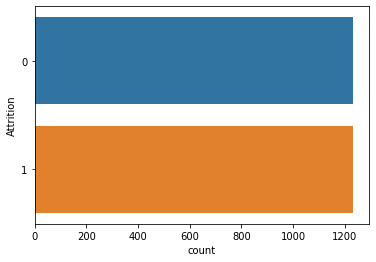

In [ ]:
sns.countplot(y=Y,data=Y)

In [ ]:
X_scaled = X.to_numpy()
X_scaled=np.insert(X_scaled,0,values=1,axis=1)
print(X_scaled)

[[ 1 41  2 ...  4  0  5]
 [ 1 49  1 ...  7  1  7]
 [ 1 37  2 ...  0  0  0]
 ...
 [ 1 35  1 ...  2  2  7]
 [ 1 25  1 ...  0  0  0]
 [ 1 37  2 ...  4  1  1]]


In [ ]:
output = np.array(Y)


# Applying Multiple Logistic Regression with Ridge Regularization

In [ ]:
# Dividing data into test and train
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X_scaled, output, test_size=0.3, random_state=42)

In [ ]:
def logistic_regression(n,alpha,X_train,lda,Y_train):
    m,k=X_train.shape
    beta=np.zeros(k)
    for i in range(n):
        cost_gradient=np.zeros(k)
        z=X_train.dot(beta)
        predicted=1/(1+np.exp(-z))
        difference=predicted-Y_train
        for j in range(k):
            cost_gradient[j]=np.sum(difference.dot(X_train[:,j]))
        for j in range(k):
            beta[j]=beta[j]*(1-(alpha*lda/m))-(alpha/m)*cost_gradient[j]
    #print(beta)
    return beta

In [ ]:
X_train[1] = X_train[1] / 10
X_train[2] = X_train[2] / 10
X_train[4] = X_train[4] / 10
X_train[5] = X_train[5] / 10
X_train[7] = X_train[7] / 10

X_train[12] = X_train[12] / 10
X_train[14] = X_train[14] / 10
X_train[15] = X_train[15] / 1000
X_train[18] = X_train[18] / 10

X_train[21] = X_train[21] / 10
X_train[24] = X_train[24] / 10
X_train[25] = X_train[25] / 10
X_train[26] = X_train[26] / 10
X_train[27] = X_train[27] / 10

In [ ]:
beta = logistic_regression(3000,0.8,X_train,0.2,Y_train)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: RuntimeWarning: overflow encountered in exp
  import sys


In [ ]:
max_accuracy = 0
best_beta = beta
best_n = 0
best_lr = 0
for n_val in range(14000,15001,1000):
    print('Running '+(str)(n_val))
    for lr_val_loop in range(0,10,1):
        lr_val = lr_val_loop / 10
        if lr_val_loop%5 == 0:
            print('Loop  '+(str)(lr_val))
        test = logistic_regression(n_val,lr_val,X_train,0.2,Y_train)
        Y2_predict=1/(1+np.exp(-(X_test.dot(test))))
        Y2_label=np.zeros(len(Y2_predict))
        for i in range(len(Y2_predict)):
            if(Y2_predict[i]>=0.5):
                Y2_label[i]=1
        TP2=0
        TN2=0
        FP2=0
        FN2=0
        Y_test=np.array(Y_test).reshape(-1,1)
        for i in range(len(Y2_label)):
            if(Y_test[i]==1 and Y2_label[i]==1):
                TP2=TP2+1
            if(Y_test[i]==1 and Y2_label[i]==0):
                FN2=FN2+1
            if(Y_test[i]==0 and Y2_label[i]==1):
                FP2=FP2+1
            if(Y_test[i]==0 and Y2_label[i]==0):
                TN2=TN2+1
        #print(TP2,TN2,FP2,FN2)
        accpos = TP2/(TP2+FP2+1)
        accneg = TN2/(TN2+FN2+1)
        acc = accneg
        if acc>max_accuracy:
            max_accuracy = acc
            best_beta = test
            best_n = n_val
            best_lr = lr_val
            print(max_accuracy)
            print(best_n)
            print(best_lr)
            print()
print(max_accuracy)
print(best_n)
print(best_lr)
print(best_beta)
beta = best_beta

Running 14000
Loop  0.0


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: RuntimeWarning: overflow encountered in exp
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: RuntimeWarning: overflow encountered in exp
  if sys.path[0] == '':


0.4979757085020243
14000
0.1

Loop  0.5
0.5636363636363636
14000
0.6

Running 15000
Loop  0.0
Loop  0.5
0.5636363636363636
14000
0.6
[  236.49097813  3972.69869652   120.00524915  1515.76475162
   197.71450711  3535.00650601   233.4391187    136.07373502
  -269.12648688   -75.22557281   -30.93371129     8.69959137
  1329.27644281  -182.60943695   421.50255682  -153.97221857
   752.02939645   202.82159686  2719.9120129    603.04822578
    -4.17829746 -1046.35654773  -110.55295436   109.84587614
 -1058.13305377 -1108.93484518    63.35413387  -994.9745553 ]


# Predicting and Labelling

In [ ]:
Y1_predict=1/(1+np.exp(-(X_test.dot(beta))))
Y1_label=np.ones(len(Y1_predict))
for i in range(len(Y1_predict)):
    if(Y1_predict[i]<0.5):
        Y1_label[i]=0

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: RuntimeWarning: overflow encountered in exp
  """Entry point for launching an IPython kernel.


# Performance Evaluation

In [ ]:
TP1=0
TN1=0
FP1=0
FN1=0
Y1_test=np.array(Y_test).reshape(-1,1)
for i in range(len(Y1_label)):
    if(Y1_test[i]==1 and Y1_label[i]==1):
        TP1=TP1+1
    if(Y1_test[i]==1 and Y1_label[i]==0):
        FN1=FN1+1
    if(Y1_test[i]==0 and Y1_label[i]==1):
        FP1=FP1+1
    if(Y1_test[i]==0 and Y1_label[i]==0):
        TN1=TN1+1


In [ ]:
print(TP1,TN1,FP1,FN1)
print((TP1/(TP1+FP1)))
print((TN1/(TN1+FN1)))

371 368 7 6
0.9814814814814815
0.983957219251337


In [ ]:
print('Final Accuracy : ',(((TP1/(TP1+FP1))+(TN1/(TN1+FN1)))/2))

Final Accuracy :  0.9827193503664092
